# 경사하강법
- 손실을 줄이는 알고리즘
- 기울기가 최소가 되는 점을 찾아서 알맞은 가중치를 찾아내는 것
- 손실함수를 최적화하는 방법중 하나

## 점진적인 학습 또는 온라인 학습

# 확률적 경사 하강법(SGD)

# 암 데이터

## 라이브러리 로딩

In [2]:
import numpy as np  # 넘파이
import pandas as pd  # 판다스
import seaborn as sns  # 시본
import matplotlib as mpl
import matplotlib.pyplot as plt  # matplotlib
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%config Completer.use_jedi = False
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

mpl.rc('font', family='D2coding')
mpl.rc('axes', unicode_minus=False)

## 훈련 데이터 로딩

In [3]:
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head(3)

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961


In [4]:
# Species는 타겟 데이터

fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish.Species.to_numpy()

## 특성 전처리와 훈련세트, 테스트세트 분리

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    fish_input, fish_target, random_state=42
)

ss = StandardScaler()
ss.fit(X_train)

train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)

## 확률적 경사 하강법으로 모델 훈련

In [8]:
# SGDClassifier 클래스 : 확률적 경사 하강법을 제공하는 분류용 클래스
from sklearn.linear_model import SGDClassifier

# loss function(손실 함수), 손실 함수의 종류를 지정하는 매개변수(loss)
# 이진분류회귀 : 이진크로스엔트로피
# 다중분류회귀 : 크로스엔트로피, 소프트엑스
# max_iter : 수행할 에포크 횟수
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, y_train)
# 평가
print(sc.score(train_scaled, y_train))
print(sc.score(test_scaled, y_test))

0.773109243697479
0.775


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [9]:
# 모델을 이어서 훈련할 때 partial_fit()
sc.partial_fit(train_scaled, y_train)
print(sc.score(train_scaled, y_train))
print(sc.score(test_scaled, y_test))

0.8151260504201681
0.85


## 가장 적절한 에포크 횟수 찾기
- 에포크 횟수가 적어 모델이 덜 학습하면 과소적합 발생
- 너무 많은 에포크 횟수는 과대적합 발생

In [10]:
# partial_fit()을 사용하여 적절한 에포크 횟수 찾기

sc = SGDClassifier(loss='log', random_state=42)

train_score = []
test_score = []

# partial_fit()만 사용하려면 훈련세트의 전체클래스의 레이블을 전달해야함
classes = np.unique(y_train)

# 300번의 에포크 동안 훈련을 반복하며 진행
for _ in range(0, 300):
    sc.partial_fit(train_scaled, y_train, classes=classes)
    train_score.append(sc.score(train_scaled, y_train))
    test_score.append(sc.score(test_scaled, y_test))

## 에포크 횟수에 따른 점수 시각화 작업

In [11]:
sns.set(font='D2coding', rc={'axes.unicode_minus': False}, style='darkgrid')
plt.rc('figure', figsize=(10,8))

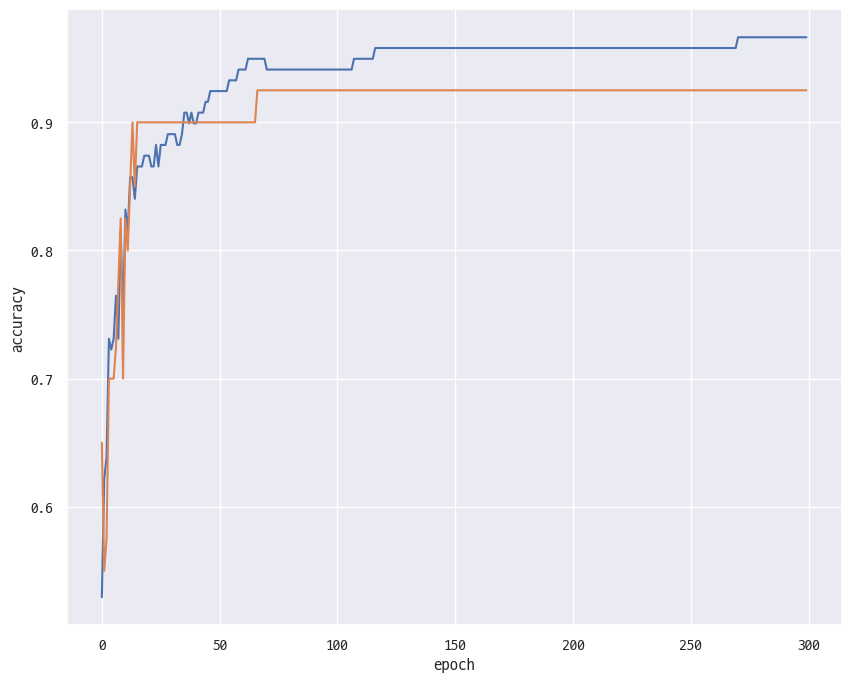

In [13]:
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [14]:
# 조기종료 가능 : 일정 에포크 동안 성능이 향상되지 않으면 더 훈련하지 않고 종료
# tol : 향상될 최소값을 지정하는 매개변수로 None으로 값을 주면 max_iter 횟수만큼 반복
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
# 서포트 벡터 머신(SVM) 알고리즘에서 사용되는 손실함수의 기본값은 hinge
sc.fit(train_scaled, y_train)

print(sc.score(train_scaled, y_train))
print(sc.score(test_scaled, y_test))

0.957983193277311
0.925
